# **Setup**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sklearn

# **Data Import**

In [2]:
df = pd.read_table('CDNOW_master.txt',sep='\s+',encoding='UTF-8',
                   header=None,
                   names=['CustomerID','OrderDate','OrderQTY','OrderValue'])

print(df.shape)
df.head()

(69659, 4)


,CustomerID,OrderDate,OrderQTY,OrderValue
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [3]:
df.isna().sum()

CustomerID    0
OrderDate     0
OrderQTY      0
OrderValue    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  69659 non-null  int64  
 1   OrderDate   69659 non-null  int64  
 2   OrderQTY    69659 non-null  int64  
 3   OrderValue  69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


## **Change OrderDate Format**

In [5]:
# Change Datatype For OrderDate
df['OrderDate'] = df['OrderDate'].astype(str)
df['OrderDate'] = pd.to_datetime(df['OrderDate'],format='%Y%m%d')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CustomerID  69659 non-null  int64         
 1   OrderDate   69659 non-null  datetime64[ns]
 2   OrderQTY    69659 non-null  int64         
 3   OrderValue  69659 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.1 MB


In [6]:
df.loc[:,['OrderDate','OrderQTY','OrderValue']].describe()

,OrderDate,OrderQTY,OrderValue
count,69659,69659.000000,69659.000000
mean,1997-07-02 22:36:51.401254656,2.410040,35.893648
min,1997-01-01 00:00:00,1.000000,0.000000
25%,1997-02-22 00:00:00,1.000000,14.490000
50%,1997-04-24 00:00:00,2.000000,25.980000
75%,1997-11-07 00:00:00,3.000000,43.700000
max,1998-06-30 00:00:00,99.000000,1286.010000
std,NaN,2.333924,36.281942


# **Data Exploration**

In [7]:
df.head()

,CustomerID,OrderDate,OrderQTY,OrderValue
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76


In [8]:
# No. Of Unique Customers
df['CustomerID'].nunique()

23570

# **Cohort Analysis**

## **Add Cohort Date**

In [9]:
df['Cohort_Date'] = df.groupby('CustomerID')['OrderDate'].transform('min')
df.head()

,CustomerID,OrderDate,OrderQTY,OrderValue,Cohort_Date
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-12
2,2,1997-01-12,5,77.00,1997-01-12
3,3,1997-01-02,2,20.76,1997-01-02
4,3,1997-03-30,2,20.76,1997-01-02


## **Add Cohort Month**

In [10]:
df['Cohort_Month'] = df['Cohort_Date'].apply(lambda x: x.strftime('%Y-%m-01'))
df.head()

,CustomerID,OrderDate,OrderQTY,OrderValue,Cohort_Date,Cohort_Month
0,1,1997-01-01,1,11.77,1997-01-01,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-12,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-12,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-02,1997-01-01
4,3,1997-03-30,2,20.76,1997-01-02,1997-01-01


In [11]:
df.tail()

,CustomerID,OrderDate,OrderQTY,OrderValue,Cohort_Date,Cohort_Month
69654,23568,1997-04-05,4,83.74,1997-03-25,1997-03-01
69655,23568,1997-04-22,1,14.99,1997-03-25,1997-03-01
69656,23569,1997-03-25,2,25.74,1997-03-25,1997-03-01
69657,23570,1997-03-25,3,51.12,1997-03-25,1997-03-01
69658,23570,1997-03-26,2,42.96,1997-03-25,1997-03-01


## **Add Cohort Duration**

In [12]:
df['CoDur_Days'] = (df['OrderDate']-df['Cohort_Date']).dt.days
df['CoDur_Months'] = (df['CoDur_Days']/30.14).astype(int) + 1

df.head()

,CustomerID,OrderDate,OrderQTY,OrderValue,Cohort_Date,Cohort_Month,CoDur_Days,CoDur_Months
0,1,1997-01-01,1,11.77,1997-01-01,1997-01-01,0,1
1,2,1997-01-12,1,12.00,1997-01-12,1997-01-01,0,1
2,2,1997-01-12,5,77.00,1997-01-12,1997-01-01,0,1
3,3,1997-01-02,2,20.76,1997-01-02,1997-01-01,0,1
4,3,1997-03-30,2,20.76,1997-01-02,1997-01-01,87,3


## **Review Cohort Data**

In [13]:
df.sort_values(['CustomerID','OrderDate'],ascending=True)

,CustomerID,OrderDate,OrderQTY,OrderValue,Cohort_Date,Cohort_Month,CoDur_Days,CoDur_Months
0,1,1997-01-01,1,11.77,1997-01-01,1997-01-01,0,1
1,2,1997-01-12,1,12.00,1997-01-12,1997-01-01,0,1
2,2,1997-01-12,5,77.00,1997-01-12,1997-01-01,0,1
3,3,1997-01-02,2,20.76,1997-01-02,1997-01-01,0,1
4,3,1997-03-30,2,20.76,1997-01-02,1997-01-01,87,3
...,...,...,...,...,...,...,...,...
69654,23568,1997-04-05,4,83.74,1997-03-25,1997-03-01,11,1
69655,23568,1997-04-22,1,14.99,1997-03-25,1997-03-01,28,1
69656,23569,1997-03-25,2,25.74,1997-03-25,1997-03-01,0,1
69657,23570,1997-03-25,3,51.12,1997-03-25,1997-03-01,0,1


In [14]:
df.loc[:,['CoDur_Days','CoDur_Months']].describe()

,CoDur_Days,CoDur_Months
count,69659.000000,69659.000000
mean,140.905942,5.354872
std,159.163562,5.132170
min,0.000000,1.000000
25%,0.000000,1.000000
50%,70.000000,3.000000
75%,266.000000,9.000000
max,544.000000,19.000000


## **Order & Cohort Date In String**

In [15]:
df['Cohort_Month_Str'] = df['Cohort_Date'].dt.strftime('%B %Y')
df.head()

,CustomerID,OrderDate,OrderQTY,OrderValue,Cohort_Date,Cohort_Month,CoDur_Days,CoDur_Months,Cohort_Month_Str
0,1,1997-01-01,1,11.77,1997-01-01,1997-01-01,0,1,January 1997
1,2,1997-01-12,1,12.00,1997-01-12,1997-01-01,0,1,January 1997
2,2,1997-01-12,5,77.00,1997-01-12,1997-01-01,0,1,January 1997
3,3,1997-01-02,2,20.76,1997-01-02,1997-01-01,0,1,January 1997
4,3,1997-03-30,2,20.76,1997-01-02,1997-01-01,87,3,January 1997


## **Create Cohort Data**

In [16]:
Cohort_Data = df.groupby(['Cohort_Month','Cohort_Month_Str','CoDur_Months'])['CustomerID'].nunique().reset_index()
Cohort_Data.rename({'Cohort_Month':'Cohort','Cohort_Month_Str':'Cohort_Str','CoDur_Months':'Duration','CustomerID':'Customer_Count'},
                   axis=1,inplace=True)      
Cohort_Data.head()

,Cohort,Cohort_Str,Duration,Customer_Count
0,1997-01-01,January 1997,1,7846
1,1997-01-01,January 1997,2,1060
2,1997-01-01,January 1997,3,809
3,1997-01-01,January 1997,4,705
4,1997-01-01,January 1997,5,635


## **Pivot Cohort Data**

In [17]:
Cohort_Data_Pivot = Cohort_Data.pivot(index='Cohort', columns='Duration', values='Customer_Count')
Cohort_Data_Pivot

Duration,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Cohort,,,,,,,,,,,,,,,,,,,
1997-01-01,7846.0,1060.0,809.0,705.0,635.0,707.0,706.0,581.0,564.0,639.0,662.0,530.0,497.0,625.0,561.0,491.0,501.0,283.0,3.0
1997-02-01,8476.0,1079.0,859.0,737.0,784.0,776.0,605.0,630.0,730.0,691.0,575.0,535.0,657.0,665.0,559.0,531.0,346.0,1.0,NaN
1997-03-01,7248.0,918.0,682.0,708.0,671.0,523.0,579.0,606.0,641.0,497.0,449.0,552.0,598.0,429.0,466.0,338.0,11.0,NaN,NaN


In [18]:
# Change Index From Datetime Format To String
Cohort_Data_Pivot.index = pd.to_datetime(Cohort_Data_Pivot.index).strftime('%B %Y')
Cohort_Data_Pivot

Duration,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Cohort,,,,,,,,,,,,,,,,,,,
January 1997,7846.0,1060.0,809.0,705.0,635.0,707.0,706.0,581.0,564.0,639.0,662.0,530.0,497.0,625.0,561.0,491.0,501.0,283.0,3.0
February 1997,8476.0,1079.0,859.0,737.0,784.0,776.0,605.0,630.0,730.0,691.0,575.0,535.0,657.0,665.0,559.0,531.0,346.0,1.0,NaN
March 1997,7248.0,918.0,682.0,708.0,671.0,523.0,579.0,606.0,641.0,497.0,449.0,552.0,598.0,429.0,466.0,338.0,11.0,NaN,NaN


In [19]:
# Change Values To Percentage
Cohort_Data_Pivot_PCT = Cohort_Data_Pivot.divide(Cohort_Data_Pivot.iloc[:,0],axis=0)
Cohort_Data_Pivot_PCT.head()

Duration,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Cohort,,,,,,,,,,,,,,,,,,,
January 1997,1.0,0.135101,0.103110,0.089855,0.080933,0.090110,0.089982,0.074050,0.071884,0.081443,0.084374,0.067550,0.063344,0.079658,0.071501,0.062580,0.063854,0.036069,0.000382
February 1997,1.0,0.127301,0.101345,0.086951,0.092496,0.091553,0.071378,0.074328,0.086126,0.081524,0.067839,0.063119,0.077513,0.078457,0.065951,0.062647,0.040821,0.000118,NaN
March 1997,1.0,0.126656,0.094095,0.097682,0.092577,0.072158,0.079884,0.083609,0.088438,0.068571,0.061948,0.076159,0.082506,0.059189,0.064294,0.046634,0.001518,NaN,NaN


## **Heatmap**

In [20]:
Color01 =  sns.light_palette('crimson')
Color01

[(0.9518458706913332, 0.9411685470430606, 0.9416261497237904),
 (0.9340257161609097, 0.7686211121442524, 0.8003597433084441),
 (0.9162055616304862, 0.5960736772454442, 0.6590933368930978),
 (0.8983854071000628, 0.42352624234663605, 0.5178269304777514),
 (0.8805652525696392, 0.25097880744782775, 0.37656052406240503),
 (0.8627450980392157, 0.0784313725490196, 0.23529411764705882)]

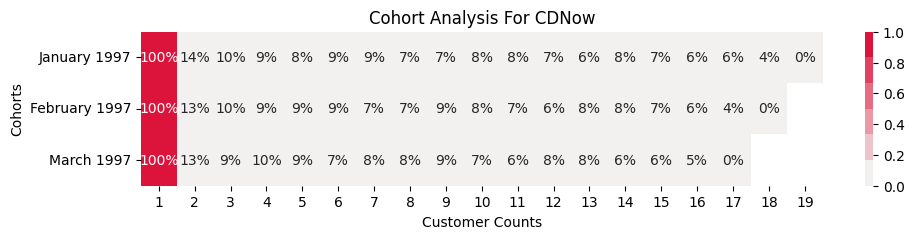

In [21]:
plt.figure(figsize=(11,2))
sns.heatmap(Cohort_Data_Pivot_PCT,annot=True,vmin=0,vmax=1,cmap=Color01,fmt='.0%',
            annot_kws={'size':10})
plt.title('Cohort Analysis For CDNow')
plt.xlabel('Customer Counts')
plt.ylabel('Cohorts')
plt.show()

# **CLV Analysis**

* What will the customer spend in the next 90 Days ? (Regression)
* What is the probability of a customer to make a purchase in the next 90 days ? (Classification)

## **Purchase Value Prediction**

### **Feature Engineering**

In [22]:
from datetime import timedelta

n_days = 90
last_date = df['OrderDate'].max()
CutOff_Date = last_date - timedelta(days=n_days)
CutOff_Date

Timestamp('1998-04-01 00:00:00')

In [23]:
df_Before = df[df['OrderDate']<=CutOff_Date]

print(df_Before.shape)
df_Before.head()

(63799, 9)


,CustomerID,OrderDate,OrderQTY,OrderValue,Cohort_Date,Cohort_Month,CoDur_Days,CoDur_Months,Cohort_Month_Str
0,1,1997-01-01,1,11.77,1997-01-01,1997-01-01,0,1,January 1997
1,2,1997-01-12,1,12.00,1997-01-12,1997-01-01,0,1,January 1997
2,2,1997-01-12,5,77.00,1997-01-12,1997-01-01,0,1,January 1997
3,3,1997-01-02,2,20.76,1997-01-02,1997-01-01,0,1,January 1997
4,3,1997-03-30,2,20.76,1997-01-02,1997-01-01,87,3,January 1997


In [24]:
df_After = df[df['OrderDate']>CutOff_Date]

print(df_After.shape)
df_After.head()

(5860, 9)


,CustomerID,OrderDate,OrderQTY,OrderValue,Cohort_Date,Cohort_Month,CoDur_Days,CoDur_Months,Cohort_Month_Str
8,3,1998-05-28,1,16.99,1997-01-02,1997-01-01,511,17,January 1997
38,9,1998-06-08,2,41.98,1997-01-01,1997-01-01,523,18,January 1997
68,25,1998-04-17,1,12.99,1997-01-01,1997-01-01,471,16,January 1997
69,25,1998-05-25,1,10.49,1997-01-01,1997-01-01,509,17,January 1997
70,25,1998-06-03,3,24.97,1997-01-01,1997-01-01,518,18,January 1997


### **Target Feature**

In [35]:
df_target = df_After \
            .drop(['OrderQTY','Cohort_Date','Cohort_Month','CoDur_Days','CoDur_Months','Cohort_Month_Str'],axis=1) \
            .groupby('CustomerID') \
            .agg({'OrderValue':'sum'}) \
            .rename({'OrderValue':'90Days_Total_OrderValue'},axis=1) \
            .assign(spend_90_flag = 1)

df_target

,90Days_Total_OrderValue,spend_90_flag
CustomerID,,
3,16.99,1
9,41.98,1
25,73.43,1
29,48.45,1
31,117.99,1
...,...,...
23529,40.56,1
23534,10.48,1
23555,77.44,1


### **Recency Feature**

In [37]:
Recency_Max_Date = df_Before['OrderDate'].max()
Recency_Max_Date

Timestamp('1998-04-01 00:00:00')

In [48]:
Recency_Data = df_Before.loc[:,['CustomerID','OrderDate']] \
    .groupby('CustomerID') \
    .apply(lambda x: (x['OrderDate'].max() - Recency_Max_Date)) \
    .to_frame() \
    .rename(columns={0:'Recency'}) \

Recency_Data.head(10)

,Recency
CustomerID,
1,-455 days
2,-444 days
3,-127 days
4,-110 days
5,-88 days
6,-455 days
7,-10 days
8,-3 days
9,-323 days


### **Frequency Feature**

## **Purchase Probability Prediction**